<a href="https://colab.research.google.com/github/FernandoZR83/ANN_DL_ML/blob/master/Simple_CNN_First.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minimal Example. Regression
## Import relevant libraries



In [0]:
# mathematical operations
import numpy as np
#Plots
import matplotlib.pyplot as plt
#Nice 3D
from mpl_toolkits.mplot3d import axes3d

## Generate random input data to train on
### We´re gonna generate a model with this form: 
$  y = xs + zs +b $

$ targets = f(x,z) = 2*x -3*z + 5 + noise $

In [2]:
observations=1000
xs=np.random.uniform(low=-10,high=10,size=(observations,1))
zs=np.random.uniform(low=-10,high=10,size=(observations,1))
inputs= np.column_stack((xs,zs))
print(inputs.shape)#We verify dimensions

(1000, 2)


## Create the targets we will aim at

In [3]:
noise = np.random.uniform(-1,1,(observations,1))
targets = 2*xs - 3*zs + 5 + noise
print(targets.shape)

(1000, 1)


### Plot the data
##### The point is to see that there is a strong trend that our model should learn to reproduce

In [4]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
targets = targets.reshape(observations,)

# Plotting according to the conventional matplotlib.pyplot syntax

# Declare the figure
fig = plt.figure()

# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection = '3d')

# Choose the axes.
ax.plot(xs, zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# You can fiddle with the azim parameter to plot the data from different angles. Just change the value of azim=100
# to azim = 0 ; azim = 200, or whatever. Check and see what happens.
ax.view_init(azim=100)

# So far we were just describing the plot. This method actually shows the plot. 
plt.show()

# We reshape the targets back to the shape that they were in before plotting.
# This reshaping is a side-effect of the 3D plot. Sorry for that.
targets = targets.reshape(observations,1)

##### Initialize weights and biases. We need two variables

In [5]:
#Initialize variables

init_range = 0.1
#Size(2,1) porque necesitamos dos pesos
weights=np.random.uniform(-init_range, init_range, size=(2,1))

#Sólo necesitamos un "bias"

bias = np.random.uniform(-init_range, init_range, size=1)

print(weights)
print(bias)

[[0.06799681]
 [0.0765899 ]]
[0.05255384]


Select learning rate

In [0]:
learning_rate = 0.05

Train the model

In [8]:
#We must create a loop to train the model until gradient descent coonverges to zero
#Outputs have the form  y = mx + b 
for i in range (100000):
  outputs = np.dot(inputs, weights) + bias
  deltas = outputs - targets
  # As we are making regression, our cost function is L_2
  loss=np.sum(deltas ** 2) / 2 / observations # Makes the learning independent of the number of observations
  print(loss)
  #update deltas and scale them
  deltas_scaled = deltas/observations
  #update weights
  #Transpose inputs matrix due to dimensions
  weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
  bias = bias - learning_rate * np.sum(deltas_scaled)
    

233.27870572572337
119.32934551422711
63.046762282446416
35.044052201075765
20.931686570466837
13.66046281420708
9.774820456087884
7.579049018185619
6.239540184097799
5.345195372090389
4.6921295243433505
4.17820221042348
3.7513347468453437
3.3841721958118742
3.0616515128495574
2.774893674046659
2.5181955147483777
2.287541680101215
2.0798627099261577
1.8926599406675773
1.7238112620174773
1.5714665057573314
1.4339876717882334
1.3099119533174486
1.1979266820927077
1.0968507900848987
1.005620074056566
0.9232748739690761
0.8489494309805252
0.7818625168629875
0.7213090911606493
0.6666528272670997
0.6173193940198212
0.5727904051312371
0.5325979645068246
0.496319746032169
0.46357455411915777
0.4340183173784569
0.40734047283892594
0.3832607024845323
0.36152598770193983
0.3419079506315295
0.32420045445823303
0.30821743741354635
0.293790957722794
0.2807694289516229
0.2690160272080007
0.25840725346258303
0.248831635880624
0.24018855852998675
0.23238720415777875
0.22534559992679237
0.21898975608478

## print weights and biases and see if we have worked correctly
Weights and biases must be alike to coeficientes we define (2, -3, 5)

In [9]:
print(weights)
print(bias)

[[ 1.99703732]
 [-2.99797211]]
[4.96461905]


## Plot las outputs vs targets
Since they are last ones at the end of the training, they represent the final model accuracy. The closer this plot is to a 45 degree, the closer  target and output value are

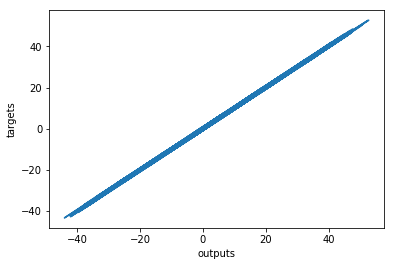

In [10]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

Change loss function to L2  (without divide it by 2)

In [11]:
#We must create a loop to train the model until gradient descet coonverges to zero
#Outputs have the form  y = mx + b 
for i in range (10000):
  outputs = np.dot(inputs, weights) + bias
  deltas = outputs - targets
  # As we are making regression, our cost function is L_2
  loss=np.sum(deltas ** 2) / observations # Makes the learning independent of the number of observations
  print(loss)
  #update deltas and scale them
  deltas_scaled = deltas/observations
  #update weights
  #Transpose inputs matrix due to dimensions
  weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
  bias = bias - learning_rate * np.sum(deltas_scaled)
    

0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.320163576474365
0.32016357

In [12]:
#!rm -rf '/content/Azure_DA/'
!git clone 'https://github.com/FernandoZR83/Azure_DA'

Cloning into 'Azure_DA'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 31 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (31/31), done.


In [13]:
print(weights)
print(bias)

[[ 1.99703732]
 [-2.99797211]]
[4.96461905]


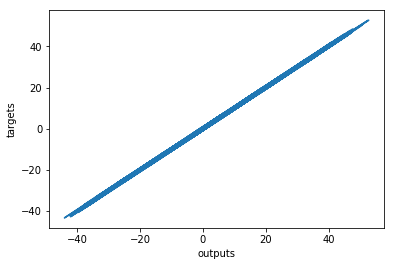

In [14]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

Тry with the L1-norm loss, given by the sum of the ABSOLUTE value of $ yj - tj $

In [16]:
lr = 0.015
for i in range (10000):
  outputs = np.dot(inputs, weights) + bias
  deltas = outputs - targets
  # As we are making regression, our cost function is L_2
  loss=np.sum(deltas) / observations # Makes the learning independent of the number of observations
  print(loss)
  #update deltas and scale them
  deltas_scaled = deltas/observations
  #update weights
  #Transpose inputs matrix due to dimensions
  weights = weights - lr * np.dot(inputs.T, deltas_scaled)
  bias = bias - lr * np.sum(deltas_scaled)
    

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [17]:
print(weights)
print(bias)

[[nan]
 [nan]]
[nan]


In [18]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

Create a function $ f(x,z) = 13*xs + 7*zs - 12 $. Does the algorithm work in the same way?

In [9]:
observations=1000
xs=np.random.uniform(low=-10,high=10,size=(observations,1))
zs=np.random.uniform(low=-10,high=10,size=(observations,1))
inputs= np.column_stack((xs,zs))
print(inputs.shape)#We verify dimensions
noise = np.random.uniform(-1, 1, (observations,1))
targets = 13*xs - 7*zs -12 + noise
print(targets.shape)
init_range = 0.1

# Weights are of size k x m, where k is the number of input variables and m is the number of output variables
# In our case, the weights matrix is 2x1 since there are 2 inputs (x and z) and one output (y)
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
bias = np.random.uniform(low=-init_range, high=init_range, size=1)

#Print the weights to get a sense of how they were initialized.
print (weights)
print (bias)

(1000, 2)
(1000, 1)
[[ 0.08421641]
 [-0.08005275]]
[0.05999867]


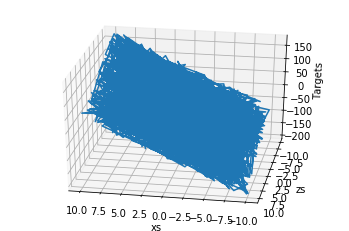

In [10]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
targets = targets.reshape(observations,)

# Plotting according to the conventional matplotlib.pyplot syntax

# Declare the figure
fig = plt.figure()

# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection = '3d')

# Choose the axes.
ax.plot(xs, zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# You can fiddle with the azim parameter to plot the data from different angles. Just change the value of azim=100
# to azim = 0 ; azim = 200, or whatever. Check and see what happens.
ax.view_init(azim=100)

# So far we were just describing the plot. This method actually shows the plot. 
plt.show()

# We reshape the targets back to the shape that they were in before plotting.
# This reshaping is a side-effect of the 3D plot. Sorry for that.
targets = targets.reshape(observations,1)

In [11]:
lr=0.02
#We must create a loop to train the model until gradient descent coonverges to zero
#Outputs have the form  y = mx + b 
for i in range (10000):
  outputs = np.dot(inputs, weights) + bias
  deltas = outputs - targets
  # As we are making regression, our cost function is L_2
  loss=np.sum(deltas ** 2) / 2 / observations # Makes the learning independent of the number of observations
  print(loss)
  #update deltas and scale them
  deltas_scaled = deltas/observations
  #update weights
  #Transpose inputs matrix due to dimensions
  weights = weights - lr * np.dot(inputs.T, deltas_scaled)
  bias = bias - lr * np.sum(deltas_scaled)
    

3836.5500378526
408.9336880576568
97.37686866443138
66.73910990949443
61.65844067996666
59.001287506893775
56.653922701613844
54.41843540181467
52.27313897866183
50.21284190201381
48.23402795575275
46.33346013481662
44.50804301220214
42.75480489708982
41.070891737159016
39.453562346221325
37.90018392902689
36.408227794083366
34.975265237143134
33.598963587583725
32.27708241113171
31.00746986273605
29.78805918365358
28.616865337043155
27.491981776592255
26.41157734291564
25.373893282673702
24.37724038555826
23.419996234484906
22.50060256451598
21.61756272621441
20.769439249299435
19.954851502638018
19.172473446762748
18.421031475257617
17.699302341497837
17.006111167368594
16.34032953072119
15.70087362845342
15.086702512223514
14.496816393926137
13.930255018171549
13.386096099118804
12.86345381911819
12.361477386719104
11.879349651695794
11.416285774836517
10.971531950330732
10.54436417867434
10.134087088095905
9.740032802584603
9.361559854677857
8.998052141238434
8.648917920521232
8.31

In [12]:
print(weights)
print(bias)

[[12.99976238]
 [-7.00026504]]
[-11.9667431]


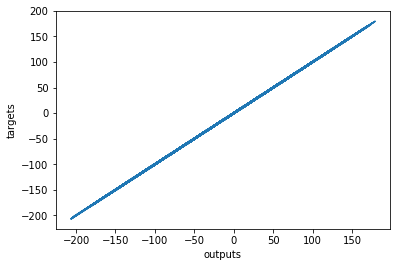

In [13]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()